#### Módulo principal

Se comienza por cargar y verficar el dataset previamente organizado sin valores atípicos, nulos o clases mal
escritas.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("./Clean datasets/cleanData.csv")
print(df['CLASE'].unique())
print(df['GRAVEDAD'].unique())

['Choque' 'Otro' 'Caida Ocupante' 'Atropello' 'Volcamiento'
 'Caída Ocupante' 'Choquey Atropello' 'Incendio']
['HERIDO' 'SOLO DAÑOS' 'MUERTO']


En este punto de el desarrollo, nuestro dataset tiene las siguientes características para entrenar
['DIA_NOMBRE', 'CLASE', 'DIRECCION', 'TIPO_GEOCOD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA'],
la característica['GRAVEDAD'] que representa el tipo de accidente es la planeada para clasificar mientras que
la columna vala columna ['PERIODO'] se conserva sólo para posteriormente dividir los datos de entrenamiento en 2017-2018
 y para los de prueba 2019.

Como el modelo que se planeado a implementar es de machine learning, es necesario realizar una codificación
de clases porque este tipo de modelos sólo admite valores númericos como entrada


Para esto teníamos dos opciones:
- Label Encoder: A cada clase de cada columna categórica se le asigna un número entero distinto.
- One Hot Encoder: Por cada columna con n-clases crea n columnas nuevas en donde a la fila correspondiente
le asigna un valor binario "0" o "1" en la columna creada para la clase de el valor original

A pesar de que la teoría señale que One Hot Encoder tra major beneficio cuando las clases no tienen ninguna
relación jerarquica como en el caso de nosotros, se descartó esta opción porque existen categorías con más de
70 clases que terminan por generar una matriz dispersa poco óptima e inmanejable.

En el siguiente fragmento se codifican todas las clases

In [2]:
le = LabelEncoder()
features = ['DIA_NOMBRE', 'CLASE', 'DIRECCION', 'TIPO_GEOCOD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA']
x=df.loc[:,features].apply(le.fit_transform)
x

,DIA_NOMBRE,CLASE,DIRECCION,TIPO_GEOCOD,BARRIO,COMUNA,DISENO,MES,DIA
0,0,3,3025,4,226,37,3,6,1
1,4,3,18519,4,192,23,2,4,9
2,0,3,5310,4,41,47,9,4,6
3,4,3,14634,4,98,32,9,5,27
4,1,6,19725,4,108,37,9,5,7
...,...,...,...,...,...,...,...,...,...
113654,3,1,7398,4,58,38,9,7,5
113655,6,3,14842,4,220,65,9,6,4
113656,6,6,14186,4,117,65,9,7,22
113657,6,3,3082,4,138,47,9,6,18


Comunmente el siguiente paso sería eliminar los datos "Outliers" mediante una distribución como la gaussiana
donde se elimen los datos que se encuentren en las colas, como la base de datos utilizada sólo tiene
valores categóricos no se puede aplicar esta técnica porque se perderían las primeras y las últimas clases.

Lo siguiente es escalar o normalizar los datos que aunque se pueda prescindir de eso, diversas fuentes hablan
de su importanciaen el preprosesamiento de datos https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
el objetivo es que la varianza de los datos quede en la misma escala, la razón para usar esto es que hay
características con muchas clases respecto a otros, esto puede ocasionar un modelo desbalanceado.
"La escala para una muestra x se calcula como z = (x - u) / s donde u es la media de las muestras y s es la desviación
estandar"

En el siguiente bloque se escalan los datos.

In [3]:
x=MinMaxScaler().fit_transform(x)


In [4]:
x

array([[0.        , 0.42857143, 0.13978097, ..., 0.27272727, 0.54545455,
        0.03333333],
       [0.66666667, 0.42857143, 0.8557368 , ..., 0.18181818, 0.36363636,
        0.3       ],
       [0.        , 0.42857143, 0.24536759, ..., 0.81818182, 0.36363636,
        0.2       ],
       ...,
       [1.        , 0.85714286, 0.65551499, ..., 0.81818182, 0.63636364,
        0.73333333],
       [1.        , 0.42857143, 0.14241486, ..., 0.81818182, 0.54545455,
        0.6       ],
       [0.33333333, 0.42857143, 0.45349106, ..., 0.81818182, 0.54545455,
        0.93333333]])

## Análisis de componentes principales (PCA)
El objetivo de PCA es reducir la dimensionalidad de el dataframe en términos de columnas,
aplicandole transformaciones a los datos y obteniendo menor cantidad de columnas sacrificando la
menor cantidad de varianza posible, la varianza representa la información de nuestros datos.


Se hizo uso de la librería PCA ofrecida por sklearn, la primera implementación de PCA se realizó para 2
componentes principales sólo para comprender su uso y obtener una representación gráfica.

In [5]:
from sklearn.decomposition import PCA
pca_two = PCA (2, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False)
two_components = pca_two.fit_transform(x)
print(two_components)

[[ 0.52390691  0.25404893]
 [-0.11832783  0.07559397]
 [ 0.52521399 -0.13897575]
 ...
 [-0.47051005  0.11288281]
 [-0.48057249  0.11660942]
 [ 0.18347477  0.49692632]]


In [6]:
pcaTwo = pd.DataFrame(data = two_components
             , columns = ['Componente 1', 'Componente 2'])
pcaTwo = pd.concat([pcaTwo, df[['GRAVEDAD']]], axis = 1)
pcaTwo.head()

,Componente 1,Componente 2,GRAVEDAD
0,0.523907,0.254049,HERIDO
1,-0.118328,0.075594,HERIDO
2,0.525214,-0.138976,SOLO DAÑOS
3,-0.130257,-0.034414,SOLO DAÑOS
4,0.362430,0.060996,HERIDO


Una vez se construye un nuevo dataset con las características transformadas por PCA realizamos
una gráfica para visualizar su relación con la variable respuesta

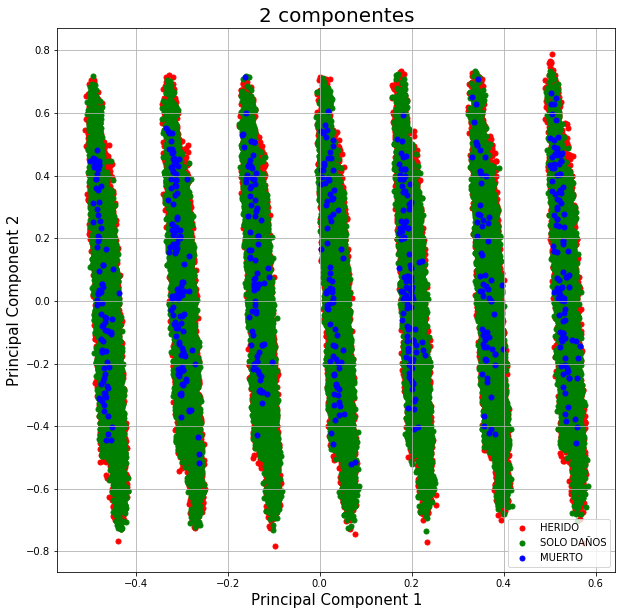

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes', fontsize = 20)
targets = pcaTwo['GRAVEDAD'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcaTwo['GRAVEDAD'] == target
    ax.scatter(pcaTwo.loc[indicesToKeep, 'Componente 1']
               , pcaTwo.loc[indicesToKeep, 'Componente 2']
               , c = color
               , s = 25)
ax.legend(targets)
ax.grid()


La gráfica no presenta ningún patrón de agrupamiento lo que nos da indicios que 2 componentes principales
de PCA no son suficientes, para seleccionar el número de compoentes se hace un análisis de varianza
con PCA para seleccionar cuál es el número más adecuado de componentes principales para PCA.
Ejemplo de datos agrupados después de PCA
<img src="https://miro.medium.com/max/1400/1*duZ0MeNS6vfc35XtYr88Bg.png" width=550 height=550 />

[0.16152505 0.30642014 0.44802423 0.58174572 0.71477404 0.83016187
 0.91549526 0.99594496 1.        ]


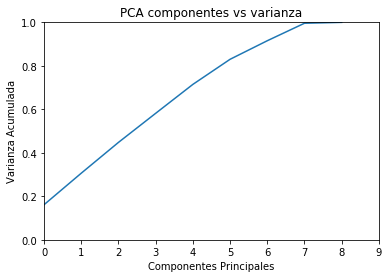

In [8]:
#Varianza acumulada
fil, col = x.shape
from matplotlib import pyplot
import numpy as np
ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(x)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA componentes vs varianza')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

Los valores presentados en la gráfica son
[0.12950323, 0.24716875, 0.36129954, 0.47311025, 0.58443023, 0.69480839, 0.80381952, 0.90943989, 1]
 donde podemos ver el porcentaje de varianza obtenido con cada posible número de componentes.
 Con esto podemos decir que si reducimos a 8 componentes podemos obtener una varianza de el 90% respecto
 a la información inicial.

 Con base en esta información se decidió trabajar en paralelo con dos dataframe, el original con las 9
 columnas y otro con las columnas reducidas por PCA y después comparar sus resultados.

In [9]:
pca= PCA (8, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False)
pca_components = pca.fit_transform(x)

pcaDF = pd.DataFrame(data = pca_components
             , columns = ['Componente 1', 'Componente 2','Componente 3', 'Componente 4','Componente 5', 'Componente 6','Componente 7', 'Componente 8'])
pcaDF = pd.concat([pcaDF, df[['PERIODO','GRAVEDAD']]], axis = 1)
print('Dataframe nuevo, 8 características PCA')
pcaDF.head()


Dataframe nuevo, 8 características PCA


,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7,Componente 8,PERIODO,GRAVEDAD
0,0.523907,0.254049,0.336609,-0.199541,0.431816,0.446247,0.127012,-0.116501,2017,HERIDO
1,-0.118328,0.075594,0.266100,0.185774,0.439785,-0.275806,0.091321,-0.130165,2017,HERIDO
2,0.525214,-0.138976,-0.320485,-0.344150,0.087431,0.294323,-0.148854,0.151980,2017,SOLO DAÑOS
3,-0.130257,-0.034414,-0.185262,0.192026,-0.385608,-0.173325,-0.028983,0.039937,2017,SOLO DAÑOS
4,0.362430,0.060996,-0.126635,-0.247023,0.127296,-0.387650,0.159664,0.422854,2017,HERIDO


In [10]:
allDF=pd.DataFrame(data=x,columns=features)
allDF=pd.concat([allDF,df[['PERIODO','GRAVEDAD']]], axis = 1)
print('Original df escalado')
allDF.head()


Original df escalado


,DIA_NOMBRE,CLASE,DIRECCION,TIPO_GEOCOD,BARRIO,COMUNA,DISENO,MES,DIA,PERIODO,GRAVEDAD
0,0.000000,0.428571,0.139781,0.571429,0.872587,0.486842,0.272727,0.545455,0.033333,2017,HERIDO
1,0.666667,0.428571,0.855737,0.571429,0.741313,0.302632,0.181818,0.363636,0.300000,2017,HERIDO
2,0.000000,0.428571,0.245368,0.571429,0.158301,0.618421,0.818182,0.363636,0.200000,2017,SOLO DAÑOS
3,0.666667,0.428571,0.676216,0.571429,0.378378,0.421053,0.818182,0.454545,0.900000,2017,SOLO DAÑOS
4,0.166667,0.857143,0.911464,0.571429,0.416988,0.486842,0.818182,0.454545,0.233333,2017,HERIDO


In [11]:
pcaDF.to_csv('CSV ready to model/withPCA_minmax.csv',index=False)
allDF.to_csv('CSV ready to model/withoutPCA_minmax.csv',index=False)